## Problem this project will solve

In [ ]:
## Based on the temperature, wind and other variables, this project will predict the whether condition.
## different models like regression will be applied to check the accuracy and precision of the results. 

## Importing the libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Basic descriptive statistics

In [67]:
## Loading the dataset
weather_data = pd.read_csv("E:\MSBA\Machine learning\seattle-weather.csv")

In [68]:
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [69]:
weather_data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [70]:
weather_data.shape

(1461, 6)

In [71]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [72]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


## Exploratory Data Analysis

In [73]:
# Checking for null values 
weather_data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [74]:
# Converting the "Date" data type from object to datetime
weather_data['date'] = pd.to_datetime(weather_data['date'])

In [75]:
weather_data['weather'].value_counts()
 

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

## Data Visualization

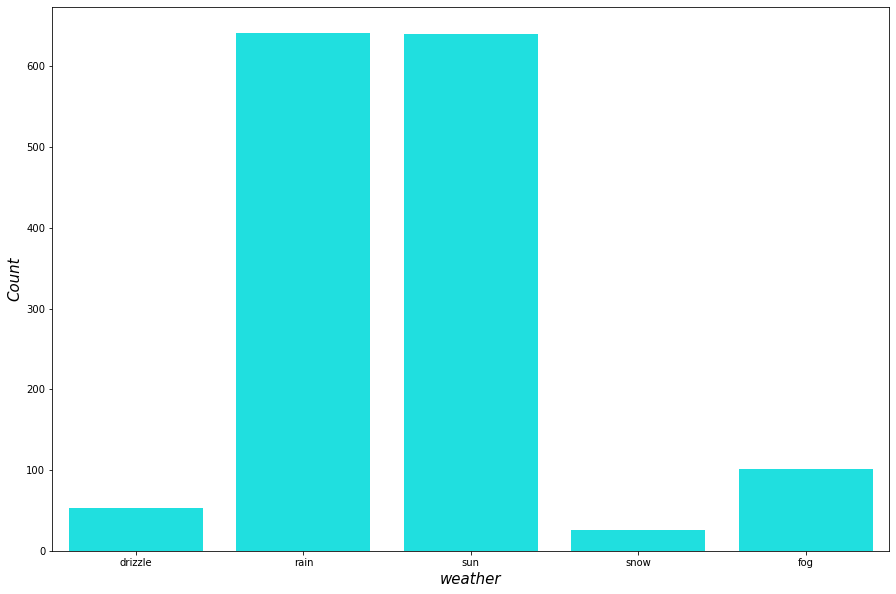

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(x='weather',data = weather_data,color ='cyan')
plt.xlabel("weather", fontsize=15,fontstyle='italic')
plt.ylabel("Count", fontsize=15,fontstyle='italic')
plt.show()

<Figure size 720x360 with 0 Axes>

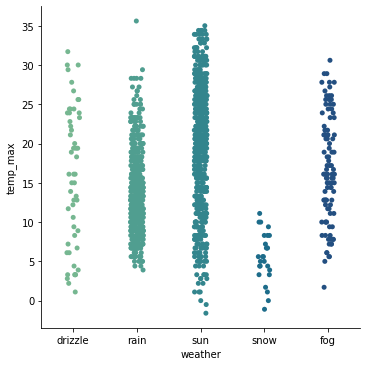

In [62]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=weather_data,palette="crest")
plt.show()

<Figure size 720x360 with 0 Axes>

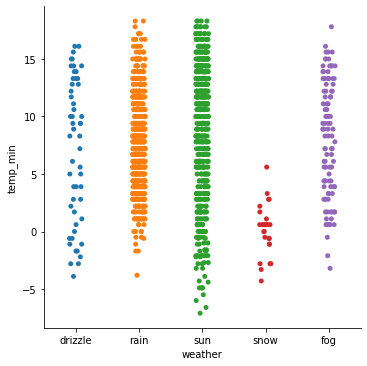

In [63]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=weather_data)
plt.show()

<Figure size 720x360 with 0 Axes>

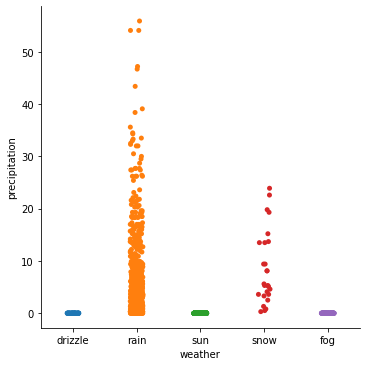

In [64]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='precipitation',data=weather_data)
plt.show()

E:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


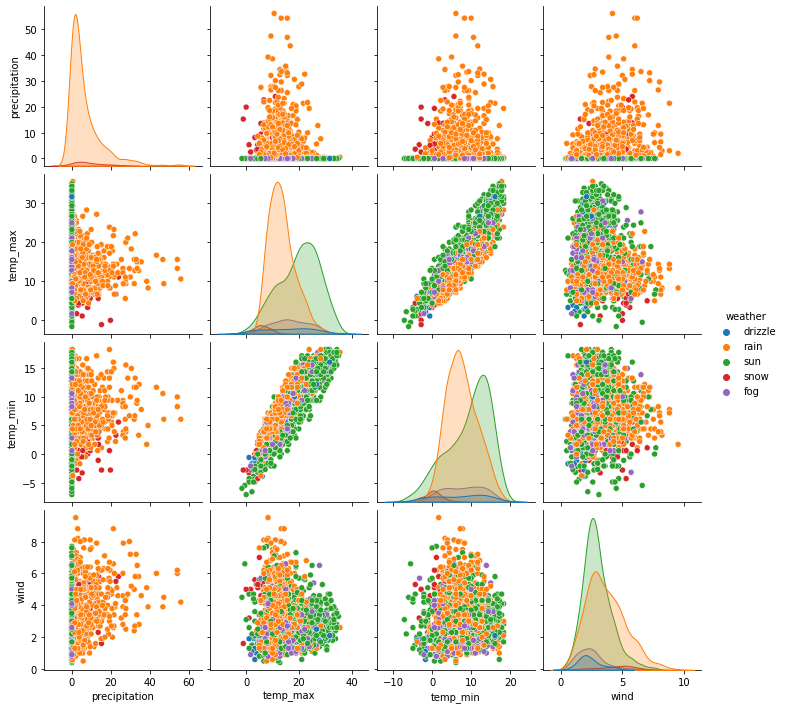

In [42]:
sns.pairplot(weather_data, hue= 'weather')
plt.show()

In [13]:
weather_data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [77]:
## Deleting the column "Date"
weather_data_1 = weather_data.drop('date', axis = 1)


## Data filteration

In [78]:
## Taking weather_prediction (only rain and sun) as dependent variable.

weather_data_1 = weather_data_1[(weather_data_1.weather == 'rain') | (weather_data_1.weather == 'sun')]
weather_data_1

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun
1456,8.6,4.4,1.7,2.9,rain
1457,1.5,5.0,1.7,1.3,rain
1459,0.0,5.6,-1.0,3.4,sun


In [79]:
## replacing  the rain and sun with 0's and 1's
## 0 represents sun and 1 represents rain
weather_data_2= weather_data_1.weather.map({"rain":1,"sun":0})
weather_data_1["weather_coded"] = weather_data_2
weather_data_2
weather_data_1.weather.replace({'yes':1,"no":0}, inplace = True)


In [80]:
weather_data_1

# now weather_coded variable will be used as DV for further analysis

,precipitation,temp_max,temp_min,wind,weather,weather_coded
1,10.9,10.6,2.8,4.5,rain,1
2,0.8,11.7,7.2,2.3,rain,1
3,20.3,12.2,5.6,4.7,rain,1
4,1.3,8.9,2.8,6.1,rain,1
5,2.5,4.4,2.2,2.2,rain,1
...,...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun,0
1456,8.6,4.4,1.7,2.9,rain,1
1457,1.5,5.0,1.7,1.3,rain,1
1459,0.0,5.6,-1.0,3.4,sun,0


In [81]:
## Renaming the column name weather_coded to weather_prediction
weather_data_1 = weather_data_1.rename({"weather_coded" : "weather_prediction"}, axis= 1)
weather_data_1

,precipitation,temp_max,temp_min,wind,weather,weather_prediction
1,10.9,10.6,2.8,4.5,rain,1
2,0.8,11.7,7.2,2.3,rain,1
3,20.3,12.2,5.6,4.7,rain,1
4,1.3,8.9,2.8,6.1,rain,1
5,2.5,4.4,2.2,2.2,rain,1
...,...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun,0
1456,8.6,4.4,1.7,2.9,rain,1
1457,1.5,5.0,1.7,1.3,rain,1
1459,0.0,5.6,-1.0,3.4,sun,0


In [82]:
weather_data_1["weather_prediction"].value_counts()

1    641
0    640
Name: weather_prediction, dtype: int64

# Clustering

In [84]:
cluster_data = weather_data[['precipitation','temp_max','temp_min','wind']]
cluster_data

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [85]:
from sklearn.cluster import KMeans  

In [86]:
cluster =KMeans(4)
a= cluster.fit_predict(cluster_data).reshape(-1, 1)
cluster_data['cluster'] =a
cluster_data

<ipython-input-86-b8342b8edf76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['cluster'] =a


,precipitation,temp_max,temp_min,wind,cluster
0,0.0,12.8,5.0,4.7,3
1,10.9,10.6,2.8,4.5,0
2,0.8,11.7,7.2,2.3,3
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,0
...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,0
1457,1.5,5.0,1.7,1.3,0
1458,0.0,7.2,0.6,2.6,0
1459,0.0,5.6,-1.0,3.4,0


## Principal component analysis

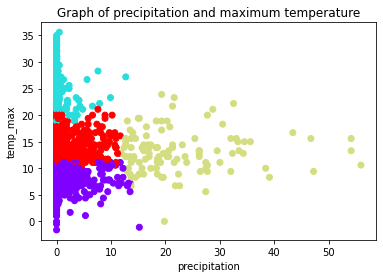

In [87]:
plt.scatter(cluster_data.precipitation,cluster_data.temp_max,
           c= cluster_data.cluster,cmap="rainbow")

plt.xlabel("precipitation")
plt.ylabel("temp_max")
plt.title("Graph of precipitation and maximum temperature")
plt.show()

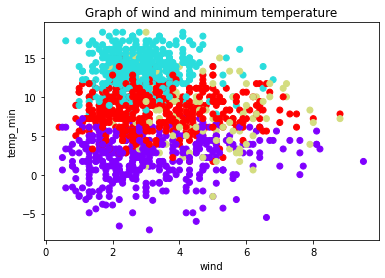

In [88]:
plt.scatter(cluster_data.wind,cluster_data.temp_min,
           c= cluster_data.cluster,cmap="rainbow")

plt.xlabel("wind")
plt.ylabel("temp_min")
plt.title("Graph of wind and minimum temperature")
plt.show()

## Declaring Independent and dependent variables

In [89]:

## tem_max , temp_min, precipitation and wind are the independent variables 
#  and weather_prediction is the dependent variable

independent = weather_data_1[[ 'temp_max', 'temp_min', 'wind','precipitation']]


dependent = weather_data_1[["weather_prediction"]]



# Splitting Data 

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train, x_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.2)

In [92]:
print("Shape of the table after splitting the data is",weather_data_1.shape)
print("Shape of x_train is",x_train.shape)
print("Shape of x_test is",x_test.shape)
print("Shape of y_train is",y_train.shape)
print("Shape of y_test is",y_test.shape) 

Shape of the table after splitting the data is (1281, 6)
Shape of x_train is (1024, 4)
Shape of x_test is (257, 4)
Shape of y_train is (1024, 1)
Shape of y_test is (257, 1)


# K Nearest Neighbors Classification

In [93]:
from sklearn import metrics
from sklearn import neighbors

In [94]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=6, metric = 'euclidean')

Fit_model = KNN.fit(x_train, y_train)


E:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [95]:
prediction = Fit_model.predict(x_test)
prediction

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [96]:
print("6NN accuracy:", metrics.accuracy_score(y_test,prediction))

# Machine's accuracy predicting the weather condition is 90.2% using 6 number of neighbors
# and euclidean distance method. 

6NN accuracy: 0.8871595330739299


In [97]:
Confusion_matrix = metrics.confusion_matrix(y_test,prediction,labels=[1,0])
Confusion_matrix

array([[ 96,  24],
       [  5, 132]], dtype=int64)

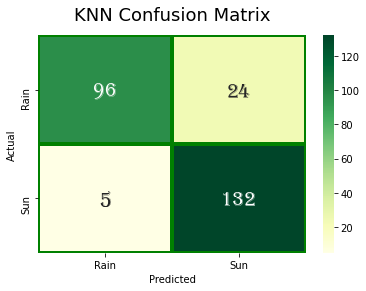

In [98]:
sns.heatmap(Confusion_matrix, annot=True, annot_kws = {'wrap': False ,'size': 20,'family': "algerian" },fmt='d',
            xticklabels=['Rain','Sun'],
            yticklabels=['Rain','Sun'],
            cmap="YlGn",linewidths=3, linecolor='green')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix', fontdict={'fontsize': 18}, pad = 15)
plt.show()

## Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
prediction_dtc = dtc.predict(x_test)

In [100]:
print("Decision tree accuracy:", metrics.accuracy_score(y_test,prediction_dtc))

Decision tree accuracy: 0.9299610894941635


In [101]:
Confusion_matrix = metrics.confusion_matrix(y_test,prediction_dtc,labels=[1,0])
Confusion_matrix

array([[115,   5],
       [ 13, 124]], dtype=int64)

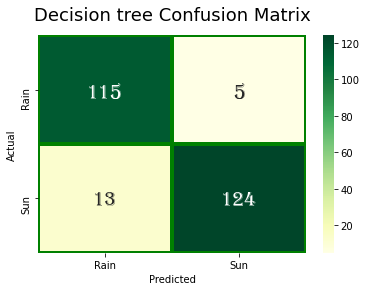

In [102]:
sns.heatmap(Confusion_matrix, annot=True, annot_kws = {'wrap': False ,'size': 20,'family': "algerian" },fmt='d',
            xticklabels=['Rain','Sun'],
            yticklabels=['Rain','Sun'],
            cmap="YlGn",linewidths=3, linecolor='green')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision tree Confusion Matrix', fontdict={'fontsize': 18}, pad = 15)
plt.show()

## Random forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
prediction_rf = rfc.predict(x_test)

<ipython-input-103-c59c517ee536>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


In [104]:
print("Random forest accuracy:", metrics.accuracy_score(y_test,prediction_rf))

Random forest accuracy: 0.9727626459143969


In [105]:
Confusion_matrix = metrics.confusion_matrix(y_test,prediction_rf,labels=[1,0])
Confusion_matrix

array([[114,   6],
       [  1, 136]], dtype=int64)

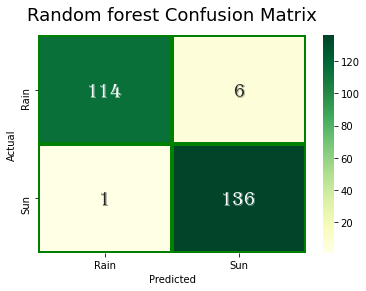

In [106]:
sns.heatmap(Confusion_matrix, annot=True, annot_kws = {'wrap': False ,'size': 20,'family': "algerian" },fmt='d',
            xticklabels=['Rain','Sun'],
            yticklabels=['Rain','Sun'],
            cmap="YlGn",linewidths=3, linecolor='green')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random forest Confusion Matrix', fontdict={'fontsize': 18}, pad = 15)
plt.show()

# Classification model comparison

In [107]:
print("Accuracy score for KNN classifier is: ", metrics.accuracy_score(y_test,prediction))
print("Accuracy score for Decision tree is: ", metrics.accuracy_score(y_test,prediction_dtc))
print("Accuracy score for Random forest is: ", metrics.accuracy_score(y_test,prediction_rf))


Accuracy score for KNN classifier is:  0.8871595330739299
Accuracy score for Decision tree is:  0.9299610894941635
Accuracy score for Random forest is:  0.9727626459143969


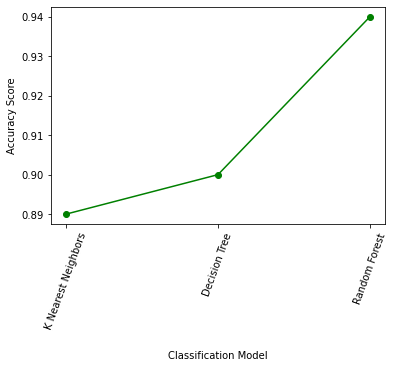

In [108]:
models_list = ['K Nearest Neighbors','Decision Tree', 'Random Forest',]
accuracy_score=[0.89,0.90,0.94]
plt.plot(accuracy_score, marker="o", color="green")
plt.xticks(ticks = [0,1,2], labels=models_list, rotation= 70)
plt.xlabel("Classification Model", labelpad=20)
plt.ylabel("Accuracy Score")
plt.show()

## Standardization of data

In [111]:
weather_data_1

,precipitation,temp_max,temp_min,wind,weather,weather_prediction
1,10.9,10.6,2.8,4.5,rain,1
2,0.8,11.7,7.2,2.3,rain,1
3,20.3,12.2,5.6,4.7,rain,1
4,1.3,8.9,2.8,6.1,rain,1
5,2.5,4.4,2.2,2.2,rain,1
...,...,...,...,...,...,...
1455,0.0,4.4,0.0,2.5,sun,0
1456,8.6,4.4,1.7,2.9,rain,1
1457,1.5,5.0,1.7,1.3,rain,1
1459,0.0,5.6,-1.0,3.4,sun,0


In [113]:
study_variables = weather_data_1[['temp_max', 'temp_min', 'wind','precipitation','weather_prediction']]

In [114]:
standard_scaler = StandardScaler()
standard_scaler.fit(study_variables)
study_variables = standard_scaler.transform(study_variables)
study_variables

array([[-0.83831936, -1.16359308,  0.8266981 ,  1.09835295,  0.99921966],
       [-0.68604207, -0.25992299, -0.70606544, -0.35775561,  0.99921966],
       [-0.61682513, -0.5885303 ,  0.96604024,  2.45354309,  0.99921966],
       ...,
       [-1.61354917, -1.38951061, -1.40277614, -0.2568372 ,  0.99921966],
       [-1.53048883, -1.94403544,  0.06031633, -0.47309094, -1.00078095],
       [-1.53048883, -2.16995296,  0.1299874 , -0.47309094, -1.00078095]])

In [115]:
standardized_data = pd.DataFrame(study_variables, columns=[['temp_max', 'temp_min', 'wind','precipitation','weather_prediction']])
standardized_data

,temp_max,temp_min,wind,precipitation,weather_prediction
0,-0.838319,-1.163593,0.826698,1.098353,0.999220
1,-0.686042,-0.259923,-0.706065,-0.357756,0.999220
2,-0.616825,-0.588530,0.966040,2.453543,0.999220
3,-1.073657,-1.163593,1.941435,-0.285671,0.999220
4,-1.696610,-1.286821,-0.775737,-0.112668,0.999220
...,...,...,...,...,...
1276,-1.696610,-1.738656,-0.566723,-0.473091,-1.000781
1277,-1.696610,-1.389511,-0.288039,0.766764,0.999220
1278,-1.613549,-1.389511,-1.402776,-0.256837,0.999220
1279,-1.530489,-1.944035,0.060316,-0.473091,-1.000781


In [117]:
IV = standardized_data[[ 'temp_max', 'temp_min', 'wind','precipitation']]
IV

,temp_max,temp_min,wind,precipitation
0,-0.838319,-1.163593,0.826698,1.098353
1,-0.686042,-0.259923,-0.706065,-0.357756
2,-0.616825,-0.588530,0.966040,2.453543
3,-1.073657,-1.163593,1.941435,-0.285671
4,-1.696610,-1.286821,-0.775737,-0.112668
...,...,...,...,...
1276,-1.696610,-1.738656,-0.566723,-0.473091
1277,-1.696610,-1.389511,-0.288039,0.766764
1278,-1.613549,-1.389511,-1.402776,-0.256837
1279,-1.530489,-1.944035,0.060316,-0.473091


In [116]:
DV = standardized_data[['weather_prediction']]
DV

,weather_prediction
0,0.999220
1,0.999220
2,0.999220
3,0.999220
4,0.999220
...,...
1276,-1.000781
1277,0.999220
1278,0.999220
1279,-1.000781


In [118]:
x_train, x_test, y_train, y_test = train_test_split(IV, DV, test_size=0.2)

In [120]:
print("Shape of the table after splitting the data is",standardized_data.shape)
print("Shape of x_train is",x_train.shape)
print("Shape of x_test is",x_test.shape)
print("Shape of y_train is",y_train.shape)
print("Shape of y_test is",y_test.shape) 

Shape of the table after splitting the data is (1281, 5)
Shape of x_train is (1024, 4)
Shape of x_test is (257, 4)
Shape of y_train is (1024, 1)
Shape of y_test is (257, 1)


## Regression algorithms

In [135]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]


def model_evaluation(y_test, predictions):
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse) # or mse**(0.5)  
    r2 = metrics.r2_score(y_test,predictions)
    
    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)
    
    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

## KNN Regression

In [136]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(x_train, y_train)
predictions = fit.predict(x_test)


In [137]:
model_evaluation(y_test, predictions)

Results of sklearn.metrics: 

MAE: 0.36316483179753517
MSE: 0.4669263545833663
RMSE: 0.6833200967214167
R-Squared: 0.5327272727272726


## Decision tree regression

In [138]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
predictions_dtr= dtr.predict(x_test)

In [139]:
model_evaluation(y_test, predictions_dtr)

Results of sklearn.metrics: 

MAE: 0.08560313892370668
MSE: 0.17120633001390093
RMSE: 0.41377086656010587
R-Squared: 0.8286666666666667


## Random Forest Regression

In [140]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
predictions_rf = rfr.predict(x_test)

<ipython-input-140-dbcf1c5a8ba4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(x_train, y_train)


In [141]:
model_evaluation(y_test, predictions_rf)

Results of sklearn.metrics: 

MAE: 0.10677046054847629
MSE: 0.10006543062957927
RMSE: 0.3163312040086771
R-Squared: 0.8998603393939394


In [147]:
model_list = ['KNN', 'Decision Tree', 'Random forest' ]

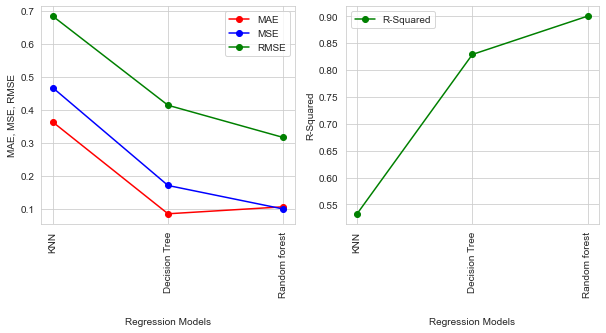

In [153]:
sns.set_style('whitegrid')

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(10,4));
ax1.plot(MAE_list,color='red', label='MAE', marker="o")
ax1.plot(MSE_list, color='blue', label='MSE', marker="o")
ax1.plot(RMSE_list,color='green', label='RMSE', marker="o")
ax2.plot(R_Squared_list,  color='green', label='R-Squared', marker="o")
ax1.set_xticks(ticks=range(len(MAE_list)))
ax2.set_xticks(ticks=range(len(R_Squared_list)))
ax1.set_xticklabels(model_list, rotation=90)
ax2.set_xticklabels(model_list, rotation=90)
ax1.legend()
ax2.legend()
ax1.set_xlabel('Regression Models', labelpad=20)
ax2.set_xlabel('Regression Models', labelpad=20)
ax1.set_ylabel('MAE, MSE, RMSE')
ax2.set_ylabel('R-Squared')
plt.show()


In [154]:
print(np.min(RMSE_list))
print(np.argmin(RMSE_list))
print(model_list[np.argmin(RMSE_list)])

0.3163312040086771
2
Random forest


In [155]:
print(np.max(R_Squared_list))
print(np.argmax(R_Squared_list))
print(model_list[np.argmax(R_Squared_list)])

0.8998603393939394
2
Random forest


# Cross validation 

In [97]:
from sklearn.model_selection import KFold

In [99]:
kf =KFold(n_splits =5)
for train_index,test_index in kf.split(independent,dependent):
    x_train,x_test,y_train,y_test= independent.iloc[train_index],independent.iloc[test_index],dependent.iloc[train_index],dependent.iloc[test_index]
    print( x_train,'\n',x_test,'\n',y_train,'\n',y_test)
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

      temp_max  temp_min  wind  precipitation
304       15.6      11.1   2.7           14.5
305       15.0      10.6   3.0            9.7
306       15.0      10.6   1.0            5.6
307       15.6      11.1   3.6            0.5
308       17.8      12.8   3.8            8.1
...        ...       ...   ...            ...
1455       4.4       0.0   2.5            0.0
1456       4.4       1.7   2.9            8.6
1457       5.0       1.7   1.3            1.5
1459       5.6      -1.0   3.4            0.0
1460       5.6      -2.1   3.5            0.0

[1024 rows x 4 columns] 
      temp_max  temp_min  wind  precipitation
1        10.6       2.8   4.5           10.9
2        11.7       7.2   2.3            0.8
3        12.2       5.6   4.7           20.3
4         8.9       2.8   6.1            1.3
5         4.4       2.2   2.2            2.5
..        ...       ...   ...            ...
299      11.1       7.2   2.5            1.5
300      14.4       9.4   5.1           23.1
301      14.4   